# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [34]:
import pandas as pd
import numpy as np
import statistics, re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load your dataset
#df = pd.read_csv('/content/Salaries.csv')
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [35]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1. Basic Data Exploration

In [36]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print()

print("Column Name | Data Type  | Null Values")
for column in df.columns:
    print(f'{column:<16} | {str(df[column].dtype):<10} | {df[column].isnull().sum()}')

Number of rows:  148654
Number of columns:  13

Column Name | Data Type  | Null Values
Id               | int64      | 0
EmployeeName     | object     | 0
JobTitle         | object     | 0
BasePay          | float64    | 609
OvertimePay      | float64    | 4
OtherPay         | float64    | 4
Benefits         | float64    | 36163
TotalPay         | float64    | 0
TotalPayBenefits | float64    | 0
Year             | int64      | 0
Notes            | float64    | 148654
Agency           | object     | 0
Status           | float64    | 148654


# 2. Descriptive Statistics

In [37]:
def basic_statistic(salary):
    mean = np.mean(salary)
    median = np.median(salary)
    mode = statistics.mode(salary)
    min = np.min(salary)
    max = np.max(salary)
    std = np.std(salary)

    print(f"Salary Mean: {mean:.2f}")
    print(f"Salary Median: {median:.2f}")
    print(f"Salary Mode: {mode}")
    print(f"Salary Minimum: {min}")
    print(f"Salary Maximum: {max}")
    print(f"Salary is in range: {max - min}")
    print(f"Salary Standard Deviation: {std:.2f}")

In [38]:
salary = np.array(df['TotalPay'])

basic_statistic(salary)

Salary Mean: 74768.32
Salary Median: 71426.61
Salary Mode: 0.0
Salary Minimum: -618.13
Salary Maximum: 567595.43
Salary is in range: 568213.56
Salary Standard Deviation: 50516.84


Removing rows with negative salary value

In [39]:
df = df[df["TotalPay"] > 0]

Calculate statistic again

In [40]:
salary = np.array(df['TotalPay'])

basic_statistic(salary)

Salary Mean: 74954.38
Salary Median: 71553.00
Salary Mode: 18594.0
Salary Minimum: 0.3
Salary Maximum: 567595.43
Salary is in range: 567595.13
Salary Standard Deviation: 50441.60


# 3. Data Cleaning 

In [26]:
# Drop null columns
df = df.drop(['Notes', 'Status'], axis=1)

# Drop rows with null values
df = df.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay'])

# Impute missing values with mean
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

# 4. Basic Data Visualization

## Histogram

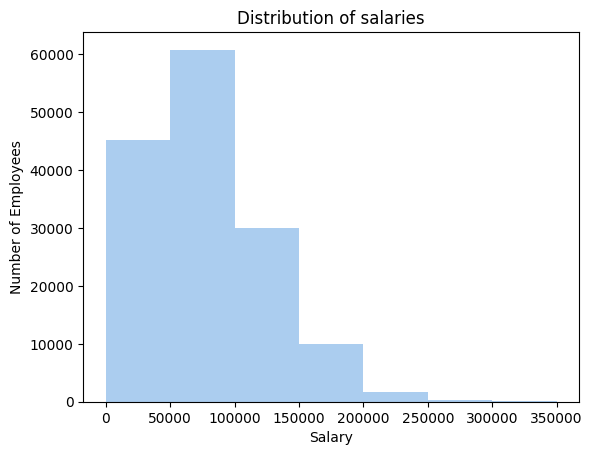

In [27]:
bins = [x for x in range(0, 400_000, 50_000)]
plt.hist(df['TotalPay'], bins=bins, color="#abcdef")
plt.xticks(bins)

plt.title("Distribution of salaries")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")

plt.show()

## Pie Chart

### Extract departments

In [28]:
def extract_department(job_title):
    lowercased = job_title.lower()
    processed_job_title = re.sub(r'[^a-z\s]', '', lowercased)

    if 'police' in processed_job_title:
        return 'Police'
    elif 'crim' in processed_job_title:
        return 'Crime'
    elif 'tech' in processed_job_title:
        return 'Technical'
    elif 'eng' in processed_job_title:
        return 'Engineering'
    elif 'admin' in processed_job_title:
        return 'Adminstration'
    elif 'fire' in processed_job_title:
        return 'Fire'
    elif 'nurse' in processed_job_title:
        return 'Nurse'
    elif 'account' in processed_job_title:
        return 'Accounting'
    elif 'business' in processed_job_title:
        return 'Business'
    elif 'electr' in processed_job_title:
        return 'Electric'
    elif 'medical' in processed_job_title:
        return 'Medical'
    elif 'transit operator' in processed_job_title:
        return 'Transit'
    
    return 'Other'

In [29]:
df['Department'] = df['JobTitle'].apply(lambda x: extract_department(x))
department_counts = df['Department'].value_counts()
department_counts

Department
Other            88421
Nurse            13346
Transit           9351
Police            8175
Engineering       7420
Fire              5824
Technical         3951
Adminstration     3063
Accounting        2205
Electric          1958
Crime             1820
Medical           1498
Business           936
Name: count, dtype: int64

In [30]:
len(department_counts)

13

### Plot Pie Chart

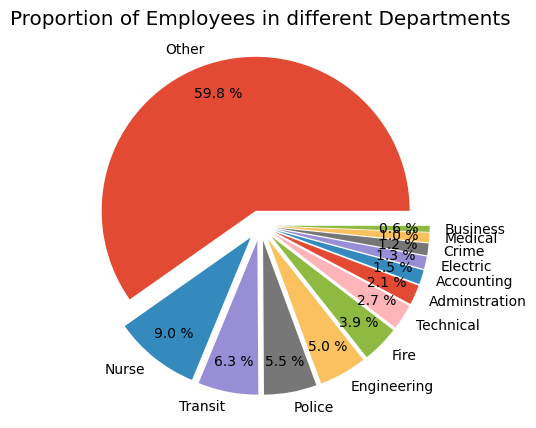

In [31]:
explode = [0.1 for department in department_counts.index]

plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

plt.pie(department_counts, labels=department_counts.index, pctdistance=0.8, autopct="%.1f %%", explode=explode)
plt.title("Proportion of Employees in different Departments")

plt.show()


# 5. Grouped Analysis

In [32]:
grouped_by_department = df.groupby('Department')

min_max_salary_by_dep = grouped_by_department['TotalPay'].agg(['min', 'max'])
std_dev_salary_by_dep = grouped_by_department['TotalPay'].std()
average_salary_by_dep = grouped_by_department['TotalPay'].mean()


print("Minimum and Maximum Salary by Department:")
print(min_max_salary_by_dep)
print()
print("Standard Deviation Salary by Department:")
print(std_dev_salary_by_dep)
print()
print("Average Salary by Department:")
print(average_salary_by_dep)


Minimum and Maximum Salary by Department:
                  min        max
Department                      
Accounting      70.23  119516.19
Adminstration  135.70  282619.96
Business        37.08  178813.70
Crime           13.35  224998.62
Electric        48.41  233464.63
Engineering     21.04  241126.97
Fire             5.80  362844.66
Medical         42.02  278569.21
Nurse            3.28  239136.48
Other            1.83  567595.43
Police          21.98  538909.28
Technical       17.95  336393.73
Transit          0.30  157310.65

Standard Deviation Salary by Department:
Department
Accounting       24670.522343
Adminstration    29943.576764
Business         28261.094291
Crime            48007.792476
Electric         39010.349138
Engineering      44459.135271
Fire             50677.394697
Medical          33019.790846
Nurse            55512.102671
Other            46192.083570
Police           41867.256519
Technical        39697.325187
Transit          29971.405755
Name: TotalPay, dtyp

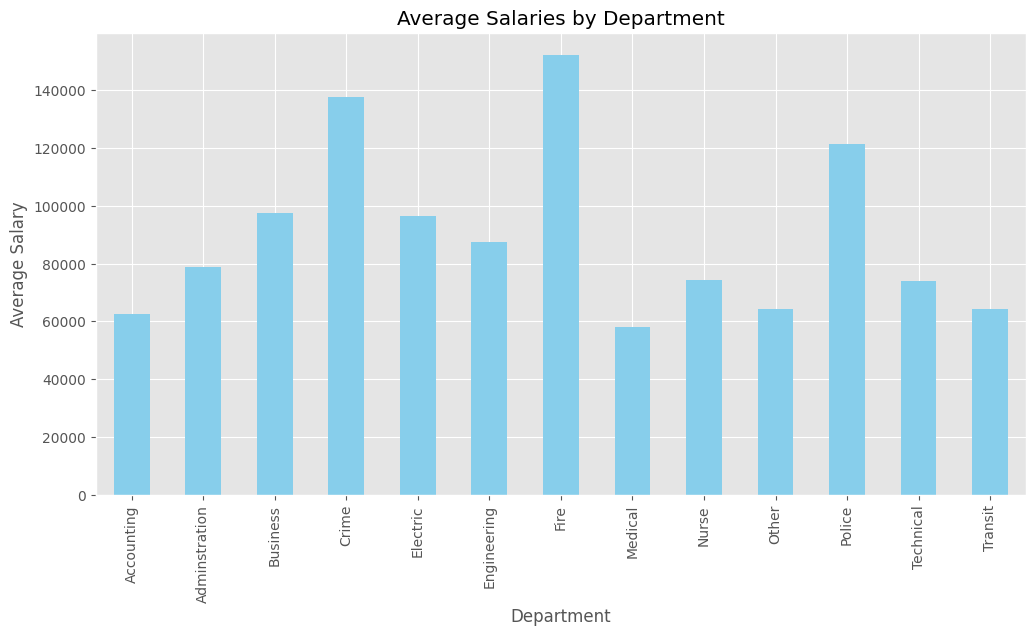

In [33]:
average_salary_by_dep.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

# 6. Simple Correlation Analysis

Correlation between TotalPay and BasePay: 0.9544936474296029


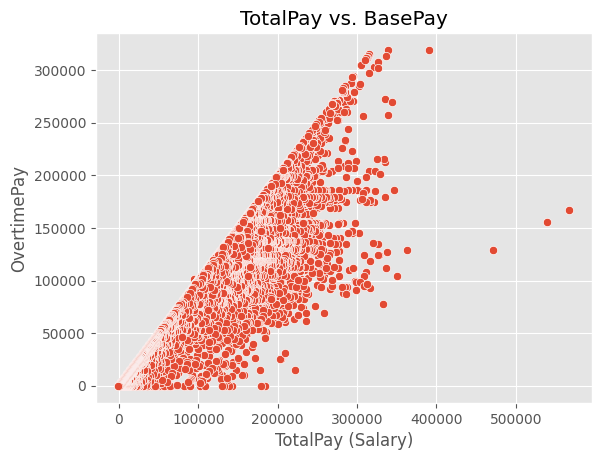

In [271]:
correlation = df['TotalPay'].corr(df['BasePay'])
print(f'Correlation between TotalPay and BasePay: {correlation}')

sns.scatterplot(x='TotalPay', y='BasePay', data=df)
plt.title('TotalPay vs. BasePay')
plt.xlabel('TotalPay (Salary)')
plt.ylabel('OvertimePay')
plt.show()


Correlation between TotalPay and OvertimePay: 0.5048588704522466


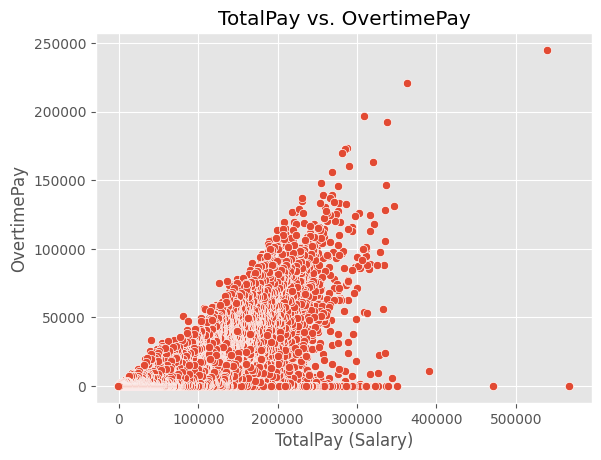

In [272]:
correlation = df['TotalPay'].corr(df['OvertimePay'])
print(f'Correlation between TotalPay and OvertimePay: {correlation}')

sns.scatterplot(x='TotalPay', y='OvertimePay', data=df)
plt.title('TotalPay vs. OvertimePay')
plt.xlabel('TotalPay (Salary)')
plt.ylabel('OvertimePay')
plt.show()


# 7. Summary of Insights

## 1. Basic Data Exploration
The dataset contains information about employees' compensation within an organization, including details such as job titles, base pay, overtime pay, benefits, and total pay. The dataset has 148,654 rows and 13 columns.

Types of columns:
- **int64**: Id, Year
- **object**: EmployeeName, JobTiltle, Agency
- **float64**: BasePay, OvertimePay, OtherPay, Benefits, totalPay, totalPayBenefits, Notes, Status


Missing values on columns:  
BasePay, OvertimePay, OtherPay, Benefits, Notes, Status

## 2. Descriptive Statistics
  
- Mean Salary: 74768.32$
- Median Salary: 71426.61$
- Mode Salary: 0.0$
- Minimum: Salary -618.13$
- Maximum Salary: 567595.43$
- Salary range: 568213.56$
- Standard Deviation: 50516.84$

After identifying negative salary values, rows with negative values are removed, and statistics are recalculated.

- Mean Salary: 74954.38$
- Median Salary: 71553.00$
- Mode Salary: 18594.0$
- Minimum: Salary 0.3$
- Maximum Salary: 567595.43$
- Salary range: 567595.13$
- Standard Deviation: 50441.60$

## 3. Data Cleaning
- Columns 'Notes' and 'Status' have 148,654 null values, equal to the number of rows, and are dropped.  
- Numerical columns 'BasePay,' 'OvertimePay,' and 'OtherPay' have a small number of null values, and corresponding rows are dropped.  
- The 'Benefits' column, with 36,163 null values, is filled with the mean of the column.  

## 4. Basic Data Visualization
### Histogram
The histogram provides a graphical representation of salary distribution, utilizing bins with a fixed range of $50,000 each. The most prevalent salary range observed is $50,000 to $100,000, followed by the range of $0 to $50,000. As salaries increase beyond this point, the frequency of employees gradually decreases.

### Pie Char
The creation of the pie chart involves a process of extracting department information from job titles using a custom function named `extract_department`. This function was designed through an exploration of the dataset, where keywords indicative of various departments were identified.

The function systematically analyzes each job title by converting it to lowercase and removing non-alphabetic characters. It then checks for specific keywords related to departments such as 'Police,' 'Crime,' 'Technical,' 'Engineering,' and others. If a job title contains one of these keywords, the corresponding department is assigned. If none of the keywords match, the job title is categorized as 'Other.'

The Pie Char represent the proportion of employees in different departments. The largest segment is labeled 'Other' (59.8%), encompassing diverse roles. Notable departments include 'Nurse' (9.0%), 'Transit' (6.3%), and 'Police' (5.5%).

## 5. Grouped Analysis

The data is grouped by the department column, and different statistics for each group were calculated, including:

### Minimum and Maximum Salary by Department:

| Department     | min     | max        |
|----------------|---------|------------|
| Accounting     | 70.23   | 119516.19  |
| Adminstration  | 135.70  | 282619.96  |
| Business       | 37.08   | 178813.70  |
| Crime          | 13.35   | 224998.62  |
| Electric       | 48.41   | 233464.63  |
| Engineering    | 21.04   | 241126.97  |
| Fire           | 5.80    | 362844.66  |
| Medical        | 42.02   | 278569.21  |
| Nurse          | 3.28    | 239136.48  |
| Other          | 1.83    | 567595.43  |
| Police         | 21.98   | 538909.28  |
| Technical      | 17.95   | 336393.73  |
| Transit        | 0.30    | 157310.65  |

### Standard Deviation Salary by Department:

| Department     | Standard Deviation |
|----------------|--------------------|
| Accounting     | 24670.52           |
| Adminstration  | 29943.58           |
| Business       | 28261.09           |
| Crime          | 48007.79           |
| Electric       | 39010.35           |
| Engineering    | 44459.14           |
| Fire           | 50677.39           |
| Medical        | 33019.79           |
| Nurse          | 55512.10           |
| Other          | 46192.08           |
| Police         | 41867.26           |
| Technical      | 39697.33           |
| Transit        | 29971.41           |

### Average Salary by Department:

| Department     | Average Salary     |
|----------------|--------------------|
| Accounting     | 62470.02           |
| Adminstration  | 78946.93           |
| Business       | 97566.15           |
| Crime          | 137696.59          |
| Electric       | 96366.33           |
| Engineering    | 87624.77           |
| Fire           | 152259.95          |
| Medical        | 58038.12           |
| Nurse          | 74447.66           |
| Other          | 64436.17           |
| Police         | 121348.61          |
| Technical      | 73937.75           |
| Transit        | 64446.95           |


## 6. Simple Correlation Analysis
### TotalPay vs. BasePay
A positive correlation of 0.95 indicates a strong linear relationship between TotalPay and BasePay.

### TotalPay vs. OvertimePay
A positive correlation of 0.41 suggests a moderate linear relationship between TotalPay and OvertimePay.